In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


<AxesSubplot:>

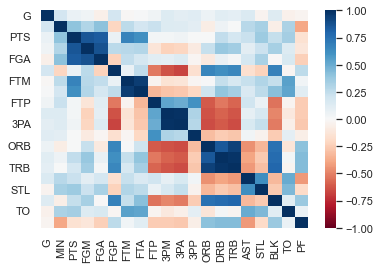

In [100]:
ppg2008 = pd.read_csv('data/ppg2008.csv')
sns.heatmap(ppg2008.corr(),cmap='RdBu',center=0,vmin=-1,vmax=1)

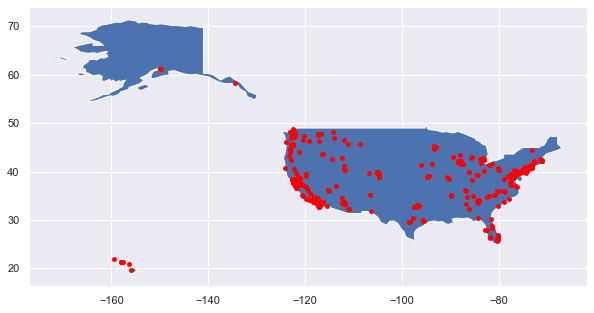

In [107]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv("data/costcos-geocoded.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world.name == "United States of America"]
gdf.plot(ax=usa.plot(figsize=(10, 6)),marker='o', color='red', markersize=15);

In [110]:
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


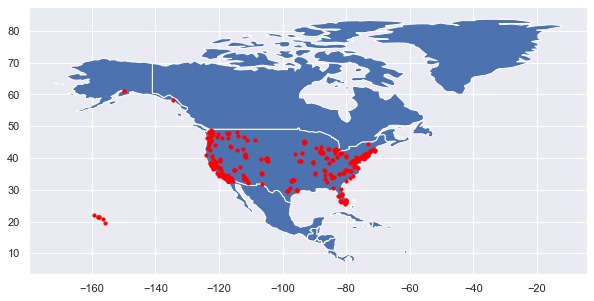

In [159]:
NorthAmerican = world[world.continent == "North America"]
gdf.plot(ax=NorthAmerican.plot(figsize=(10, 6)),marker='o', color='red', markersize=10);


In [161]:
ppg2008 = pd.read_csv('data/ppg2008.csv')

ppg2008.head()


,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


<AxesSubplot:xlabel='G', ylabel='PTS'>

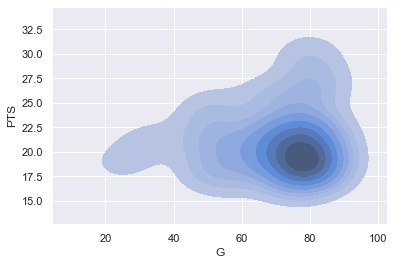

In [168]:
sns.kdeplot(data=ppg2008, x="G", y="PTS",fill=True,levels=10)
